# Analysis template for examples in Spec

In [1]:
!ls N*

N-atp111  N-atp48   N-econ47  N-econ64	N-econ73  N-EX3    N-pal13  N-pal43
N-atp134  N-atp66   N-econ58  N-econ67	N-econ76  N-EX4    N-pal19  N-pal55
N-atp163  N-atp76   N-econ59  N-econ68	N-econ77  N-EX5    N-pal23
N-atp24   N-econ36  N-econ61  N-econ71	N-EX1	  N-EX6    N-pal27
N-atp452  N-econ43  N-econ62  N-econ72	N-EX2	  N-pal11  N-pal31


## Options to select

In [2]:
problem="N-pal13"

## Shouldn't need to edit below

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import copy
import os

import pandas as pd
import numpy as np

from scipy.stats import pearsonr

from tqdm import tqdm
#import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib
import itertools
from pathlib import Path

from IPython.display import display, Markdown, Latex

In [5]:
home = str(Path.home())

In [6]:
import sys
sys.path.insert(0,"%s/rankability_toolbox_dev"%home)
import pyrankability

In [7]:
import base

In [8]:
D = base.read_instance(problem)
D

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,1,1,0,0,0,0,1,1,0,1
1,0,0,1,0,1,1,0,0,0,0,1,1,0
2,1,0,0,1,0,1,1,0,0,0,0,1,1
3,0,1,0,0,1,0,1,1,0,0,0,0,1
4,0,0,1,0,0,1,0,1,1,0,0,0,0
5,1,0,0,1,0,0,1,0,1,1,0,0,0
6,1,1,0,0,1,0,0,1,0,1,1,0,0
7,1,1,1,0,0,1,0,0,1,0,1,1,0
8,1,1,1,1,0,0,1,0,0,1,0,1,1
9,0,1,1,1,1,0,0,1,0,0,1,0,1


In [53]:
delta_lop_cont,details_lop_cont = pyrankability.rank.solve(D,method='lop',cont=True)

In [54]:
delta_lop_bin,details_lop_bin = pyrankability.rank.solve(D,method='lop',cont=False)

In [55]:
details_lop_cont['obj'],details_lop_bin['obj']

(57.000000000294904, 57.0)

In [61]:
_,details_fixed_cont_x_max = pyrankability.search.solve_fixed_cont_x(D,details_lop_bin['obj'],details_lop_cont['x'],method='lop',minimize=False)

In [62]:
details_fixed_cont_x_max['perm']

(7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4)

In [63]:
_,details_fixed_cont_x_min = pyrankability.search.solve_fixed_cont_x(D,details_lop_bin['obj'],details_lop_cont['x'],method='lop',minimize=True)
details_fixed_cont_x_min['perm']

(7, 8, 2, 11, 0, 9, 3, 12, 6, 1, 10, 4, 5)

## Rankability Analysis

In [18]:
delta_lop,details_lop = pyrankability.rank.solve(D,method='lop',cont=False)
delta_hillside,details_hillside = pyrankability.rank.solve(D,method='hillside',cont=False)

### Distance to perfection

In [19]:
delta_lop

21

In [20]:
delta_hillside

436

**Objective value for LOP (upper triangular reordered sum)**

In [21]:
details_lop['obj']

57.0

### X*

In [22]:
delta_cont = {}
details_cont = {}
delta_cont['lop'],details_cont['lop'] = pyrankability.rank.solve(D,method='lop',cont=True)
delta_cont['hillside'],details_cont['hillside'] = pyrankability.rank.solve(D,method='hillside',cont=True)

In [23]:
pd.DataFrame(pyrankability.common.threshold_x(details_cont['lop']['x']))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,1.000000,0.318831,1.000000,1.000000,0.570121,0.500000,0.429879,0.000000,1.000000,0.681169,0.000000,1.000000
1,0.000000,0.000000,0.318831,0.000000,1.000000,0.570121,0.000000,0.000000,0.000000,0.000000,0.681169,0.000000,0.000000
2,0.681169,0.681169,0.000000,0.681169,0.681169,1.000000,0.681169,0.111048,0.000000,0.681169,0.362338,0.681169,0.681169
3,0.000000,1.000000,0.318831,0.000000,1.000000,0.570121,0.500000,0.429879,0.000000,0.000000,0.681169,0.000000,1.000000
4,0.000000,0.000000,0.318831,0.000000,0.000000,0.570121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.429879,0.429879,0.000000,0.429879,0.429879,0.000000,0.429879,0.000000,0.000000,0.429879,0.111048,0.000000,0.429879
6,0.500000,1.000000,0.318831,0.500000,1.000000,0.570121,0.000000,0.429879,0.000000,0.500000,0.681169,0.000000,0.500000
7,0.570121,1.000000,0.888952,0.570121,1.000000,1.000000,0.570121,0.000000,0.570121,0.570121,1.000000,0.570121,0.570121
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.429879,0.000000,1.000000,0.681169,1.000000,1.000000
9,0.000000,1.000000,0.318831,1.000000,1.000000,0.570121,0.500000,0.429879,0.000000,0.000000,0.681169,0.000000,1.000000


In [24]:
pyrankability.common.threshold_x?

In [25]:
label = "A"
xstars = {}
indices = {}
for method in delta_cont.keys():
    details = details_cont[method]
    xstar = pd.DataFrame(pyrankability.common.threshold_x(details['x'],lower_cut=0.45,upper_cut=0.55),index=D.index,columns=D.columns)
    xstars["%s. %s"%(label,method)] = xstar
    indices["%s. %s"%(label,method)] = details['indices']
    label = chr(ord(label)+1)
g,score_df,ordered_xstars = pyrankability.plot.show_score_xstar2(xstars,
                                                                 group_label="Group",width=300,height=300,
                                                                 columns=2,resolve_scale=True)
g

alt.FacetChart(...)

In [28]:
_,pair_max_tau_details = pyrankability.search.solve_pair_max_tau(D,method='lop',verbose=False,lazy=False)
#pair_max_tau_details['tau']

In [29]:
pair_max_tau_details['obj']

4.0

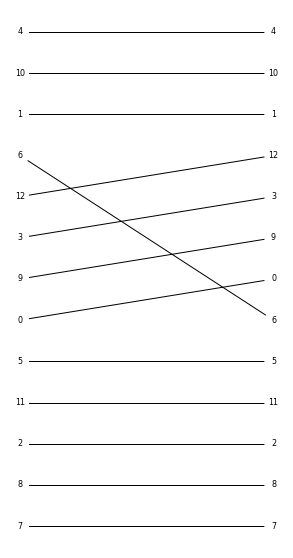

In [30]:
perm_x = np.array(pair_max_tau_details['perm_x'])
perm_y = np.array(pair_max_tau_details['perm_y'])
AB = pyrankability.plot.AB_to_P2(perm_x,perm_y)
pyrankability.plot.spider(AB)

### Finding pairs within a tau range

See if there are any two solutions that are within a decent range of each other

In [31]:
tau_range=(0.6,0.9)
_,pair_tau_range_details = pyrankability.search.solve_pair_tau_range(tau_range,D,method='lop',verbose=False,lazy=False)
pair_tau_range_details['tau']

0.8974358974358975

In [32]:
tau_range=(-.2,0.2)
_,pair_tau_range_details = pyrankability.search.solve_pair_tau_range(tau_range,D,method='lop',verbose=False,lazy=False)
pair_tau_range_details['tau']

0.1282051282051282

Now see if there are any two solutions that are far away from each other

In [33]:
tau_range=(-0.1,0.1)
_,pair_tau_range_details = pyrankability.search.solve_pair_tau_range(tau_range,D,method='lop',verbose=False,lazy=False)
pair_tau_range_details['tau']

AttributeError: Unable to retrieve attribute 'X'

## Now take a look at the example

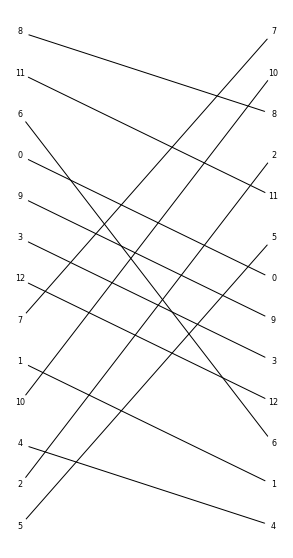

In [34]:
perm_x = np.array(pair_tau_range_details['perm_x'])
perm_y = np.array(pair_tau_range_details['perm_y'])
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(perm_x,perm_y))

In [35]:
np.sum(np.triu(D.iloc[perm_x,:].iloc[:,perm_x]))

57

In [36]:
np.sum(np.triu(D.iloc[perm_y,:].iloc[:,perm_y]))

57

Now what happens when you can't find a pair within the range

In [37]:
tau_range=(-0.001,0.001)
_,pair_tau_range_details = pyrankability.search.solve_pair_tau_range(tau_range,D,method='lop',verbose=False,lazy=False)

AttributeError: Unable to retrieve attribute 'X'

### Finding maximum pairs

In [38]:
## Amy: this seems to take a long time
_,pair_tau_range_details = pyrankability.search.solve_pair_max_tau(D,method='lop',verbose=False,lazy=False)

## Collect all solutions

In [39]:
delta_lop_with_models,details_lop_with_models = pyrankability.rank.solve(D,method='lop',cont=False,include_model=True)
delta_hillside_with_models,details_hillside_with_models = pyrankability.rank.solve(D,method='hillside',cont=False,include_model=True)

### LOP

In [40]:
model = details_lop_with_models['model']
model_file = pyrankability.common.write_model(model)
solution_file = model_file + ".solutions"
model_file

'/tmp/tmplt_u81ur/model.mps'

In [41]:
!sed -i '/^OBJSENS/d' $model_file

In [42]:
%%timeit
%%bash -s "$model_file" "$solution_file"
~/rankability_toolbox_dev/collect.sh $1 $2

Model file: /tmp/tmplt_u81ur/model.mps
Solutions file: /tmp/tmplt_u81ur/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmplt_u81ur/model.mps
Solutions file: /tmp/tmplt_u81ur/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmplt_u81ur/model.mps
Solutions file: /tmp/tmplt_u81ur/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmplt_u81ur/model.mps
Solutions file: /tmp/tmplt_u81ur/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmplt_u81ur/model.mps
Solutions file: /tmp/tmplt_u81ur/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmplt_u81ur/model.mps
Solutions file: /tmp/tmplt_u81ur/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmplt_u81ur/model.mps
Solutions file: /tmp/tmplt_u81ur/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmplt_u81ur/model.mps
Solutions file: /tmp/tmplt_u81ur/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

218 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
opt_k = details_lop_with_models['obj']

solutions = pd.read_csv(solution_file,sep=', ')
x_columns = solutions.columns[1:-1]
xs = []
a,b,c = 1,1,-2*len(x_columns)
n = int((-b + np.sqrt(b**2 - 4*a*c))/(2*a) + 1)
xstar = np.zeros((n,n))
objs = []
s = 0
for k in range(solutions.shape[0]):
    x = np.zeros((n,n))
    for c in x_columns:
        ij_str = c.replace("x(","").replace(")","")
        i,j = ij_str.split(",")
        i,j = int(i),int(j)
        x[i,j] = solutions.loc[k,c]
        x[j,i] = 1 - x[i,j]
    obj = np.sum(np.sum(D*x))
    xs.append(x)
    objs.append(obj)
    error = obj - opt_k
    xstar += x
xstar = xstar/solutions.shape[0]
pd.DataFrame(xstar)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.2,1.0,1.0,0.6,0.5,0.4,0.0,1.0,0.8,0.0,1.0
1,0.0,0.0,0.2,0.0,1.0,0.6,0.0,0.0,0.0,0.0,0.8,0.0,0.0
2,0.8,0.8,0.0,0.8,0.8,1.0,0.8,0.2,0.0,0.8,0.6,0.8,0.8
3,0.0,1.0,0.2,0.0,1.0,0.6,0.5,0.4,0.0,0.0,0.8,0.0,1.0
4,0.0,0.0,0.2,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.4,0.4,0.0,0.4,0.4,0.0,0.4,0.0,0.0,0.4,0.2,0.0,0.4
6,0.5,1.0,0.2,0.5,1.0,0.6,0.0,0.4,0.0,0.5,0.8,0.0,0.5
7,0.6,1.0,0.8,0.6,1.0,1.0,0.6,0.0,0.6,0.6,1.0,0.6,0.6
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.0,1.0,0.8,1.0,1.0
9,0.0,1.0,0.2,1.0,1.0,0.6,0.5,0.4,0.0,0.0,0.8,0.0,1.0


In [45]:
perms = []
for x in xs:
    r = np.sum(x,axis=0)
    perm = np.argsort(r)
    perms.append(perm)
perms

[array([ 7,  8,  2, 11,  6,  0,  9,  3, 12,  1, 10,  4,  5]),
 array([ 7,  8,  2, 11,  5,  0,  9,  3, 12,  6,  1, 10,  4]),
 array([ 7,  8,  2, 11,  0,  9,  3, 12,  6,  1, 10,  4,  5]),
 array([ 8, 11,  0,  9,  3, 12,  6,  7,  1, 10,  4,  2,  5]),
 array([ 8, 11,  6,  0,  9,  3, 12,  7,  1, 10,  4,  2,  5]),
 array([ 7, 10,  8,  2, 11,  5,  0,  9,  3, 12,  6,  1,  4]),
 array([ 7, 10,  8,  2, 11,  5,  6,  0,  9,  3, 12,  1,  4]),
 array([ 7,  8,  2, 11,  5,  6,  0,  9,  3, 12,  1, 10,  4]),
 array([ 8,  2, 11,  6,  0,  9,  3, 12,  7,  1, 10,  4,  5]),
 array([ 8,  2, 11,  0,  9,  3, 12,  6,  7,  1, 10,  4,  5])]

In [ ]:
(7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4)
(7, 8, 2, 11, 0, 9, 3, 12, 6, 1, 10, 4, 5)


In [60]:
taus = pd.DataFrame(np.zeros((len(perms),len(perms))))
import scipy.stats as stats
for i in range(len(perms)):
    for j in range(len(perms)):
        tau, p_value = stats.kendalltau(np.argsort(perms[i]), np.argsort(perms[j]))
        taus.iloc[i,j] = tau

In [50]:
taus.sum()

0    7.025641
1    6.512821
2    7.025641
3    5.384615
4    5.384615
5    5.384615
6    5.384615
7    6.512821
8    6.512821
9    6.512821
dtype: float64

In [ ]:
(7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4)

In [52]:
perms[0],perms[2]

(array([ 7,  8,  2, 11,  6,  0,  9,  3, 12,  1, 10,  4,  5]),
 array([ 7,  8,  2, 11,  0,  9,  3, 12,  6,  1, 10,  4,  5]))

### Hillside

In [192]:
model = details_hillside_with_models['model']
model_file = pyrankability.common.write_model(model)
model_file

'/tmp/tmprv93gkud/model.mps'

In [193]:
!head $model_file

NAME hillside
ROWS
 N  OBJ
 L  R0      
 G  R1      
 L  R2      
 G  R3      
 L  R4      
 G  R5      
 L  R6      


In [194]:
solution_file = model_file + ".solutions"

In [ ]:
%%timeit
%%bash -s "$model_file" "$solution_file"
~/rankability_toolbox_dev/collect.sh $1 $2

Model file: /tmp/tmprv93gkud/model.mps
Solutions file: /tmp/tmprv93gkud/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmprv93gkud/model.mps
Solutions file: /tmp/tmprv93gkud/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmprv93gkud/model.mps
Solutions file: /tmp/tmprv93gkud/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmprv93gkud/model.mps
Solutions file: /tmp/tmprv93gkud/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmprv93gkud/model.mps
Solutions file: /tmp/tmprv93gkud/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73

Model file: /tmp/tmprv93gkud/model.mps
Solutions file: /tmp/tmprv93gkud/model.mps.solutions
SCIP version 7.0.1 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 5.0.1] [GitHash: b41d526acf]
Copyright (C) 2002-2020 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External codes: 
  SoPlex 5.0.1         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: fcd2a2a5]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (www.coin-or.org/CppAD)
  ZLIB 1.2.11          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.1.2            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.4.0          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  PaPILO 1.0.1         parallel presolve for integer and linear optimization (https://github.com/lgottwald/PaPILO) [GitHash: 0638fc4]
  bliss 0.73